## CS460: Machine Learning - UMAP: Uniform Manifold Approximation & Projection

### In partial fulfilment to CS460: Machine Learning | By Jyotirmaya Shivottam<sup>[<a href="mailto:jyotirmaya.shivottam@niser.ac.in">a</a>]</sup><sup>[<a target="_blank" href="https://github.com/JeS24/">b</a>]</sup>

#### Webpage: http://www.niser.ac.in/~smishra/teach/cs460/lectures/lec24_1/

#### If you encounter errors of any sort, please open an issue here: <a target="_blank" href="https://github.com/JeS24/umap-cs460">GitHub</a>

#### Please refer to the webpage for analysis of the plots here and to learn more about UMAP.

#### Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import umap as u
# umap.plot may raise errors as of umap-learn-0.4.6
from umap import plot as uplot

In [2]:
# Full detail of the API

?u.UMAP

#### Loading datasets

In [3]:
# Datasets
digits = datasets.load_digits()
mnist = datasets.fetch_openml('mnist_784')
fmnist = datasets.fetch_openml('Fashion-MNIST')

#### Function to plot parts of datasets

In [4]:
def plot_data(data):
    """
    Plots part of data (100 datapoints)
    Adapted from: https://umap-learn.readthedocs.io/en/latest/basic_usage.html
    
    Parameters
    ----------
    data: numpy.ndarray
        Image (2D) data to plot

    """
    fig, ax_array = plt.subplots(10, 10)
    axes = ax_array.flatten()

    for i, ax in enumerate(axes):
        if data[i].ndim != 2:
            size = int(np.sqrt(data[i].shape[0]))
            ax.imshow(data[i].reshape((size, size)), cmap='gray_r')
        else:
            ax.imshow(data[i], cmap='gray_r')

    plt.setp(axes, xticks=[], yticks=[], frame_on=False)
    plt.tight_layout(pad=0., h_pad=0.1, w_pad=0.)

Let us plot some datapoints from each of these datasets.

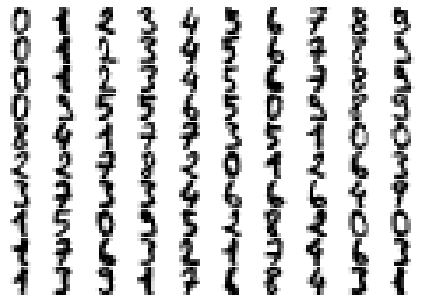

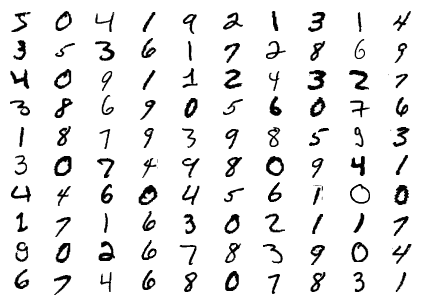

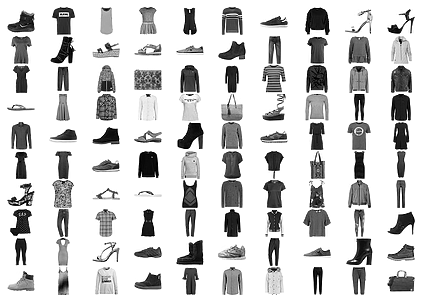

In [5]:
plot_data(digits.images)
plot_data(mnist.data)
plot_data(fmnist.data)

#### Using `umap.UMAP().fit()` with default parameters

In [6]:
map_mnist = u.UMAP().fit(mnist.data)
map_fmnist = u.UMAP().fit(fmnist.data)
map_mnist30k = u.UMAP().fit(mnist.data[:30000])
map_fmnist30k = u.UMAP().fit(fmnist.data[:30000])
map_digits = u.UMAP().fit(digits.data)

Now, let us a define a function, that creates interactive and embeddable plots, using <code>umap.plot</code> and <code>bokeh</code>.

In [7]:
# For saving interative plots as JavaScript files
# Learn more: https://docs.bokeh.org/en/latest/docs/user_guide/embed.html
from bokeh.resources import CDN
from bokeh.plotting import figure
from bokeh.embed import autoload_static

def int_plot_save(map_, labels, hover_data, map_name, data_name, image_size=360):
    """
    Uses bokeh for creating interactive plot and saves it to a JavaScript file,
    that can be embedded in HTML documents

    Parameters
    ----------
    map_: umap.UMAP
        The mapping for a dataset
    labels: numpy.ndarray
        Corresponding labels used to color code the plot
    hover_data: pandas.DataFrame
        Contains the string labels, displayed on hover
    map_name: str
        Used to JavaScript JS file
    data_name: str
        Dataset name, to be used in plot title
    image_size: int
        Size of the (1:1) image to be plotted
        Defaults to `400` (px)

    Returns
    -------
    tag: str
        <script> tag, used while embedding the plot

    """
    p = uplot.interactive(map_, labels=labels, hover_data=hover_data, point_size=2, theme="fire")
    p.plot_height = image_size
    p.plot_width = image_size
    p.title.text = f"2D Embedding for {data_name}"
    p.title.align = "center"
    p.title.text_color = "whitesmoke"
    p.title.text_font = "Source Sans Pro"
    p.title.text_font_size = "14px"
    p.border_fill_color = "#2D2D2D"
    p.min_border = 30
    uplot.show(p)

    js, tag = autoload_static(p, CDN, f"scripts/{map_name}_int.js")
    
    # Creating JS file
    with open(f"{map_name}_int.js", "w+") as f:
        f.write(js)

    return tag

#### Preparing metadata for plotting

In [8]:
hover_data_mnist = pd.DataFrame({'index':np.arange(30000), 'label':mnist.target[:30000]})
hover_data_mnist['item'] = hover_data_mnist.label.map(
    {
        '0':'0',
        '1':'1',
        '2':'2',
        '3':'3',
        '4':'4',
        '5':'5',
        '6':'6',
        '7':'7',
        '8':'8',
        '9':'9',
    }
)

labels_mnist = mnist.target[:30000]

In [9]:
hover_data_fmnist = pd.DataFrame({'index':np.arange(30000), 'label':fmnist.target[:30000]})
hover_data_fmnist['item'] = hover_data_fmnist.label.map(
    {
        '0':'T-Shirt/Top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

labels_fmnist = fmnist.target[:30000]

In [10]:
tag = int_plot_save(map_fmnist30k, labels_fmnist, hover_data_fmnist, "fmnist30k", "FashionMNIST (30,000 points)")
print(tag)
tag = int_plot_save(map_mnist30k, labels_mnist, hover_data_mnist, "mnist30k", "MNIST (30,000 points)")
print(tag)


<script src="scripts/fmnist30k_int.js" id="68d51763-a581-4dcb-99f4-d6233d3c93b5"></script>

<script src="scripts/mnist30k_int.js" id="22359df9-bbee-44b5-a293-0f9d59014d5f"></script>


#### Static plot for whole datasets

Text(0.5, 1.0, '2D Embedding for MNIST')

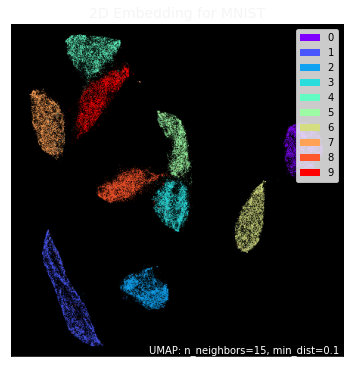

In [11]:
pm = uplot.points(map_mnist, labels=mnist.target, width=440, height=440, theme="fire")
pm.set_title('2D Embedding for MNIST', fontsize=14, color="whitesmoke")

Text(0.5, 1.0, '2D Embedding for FashionMNIST')

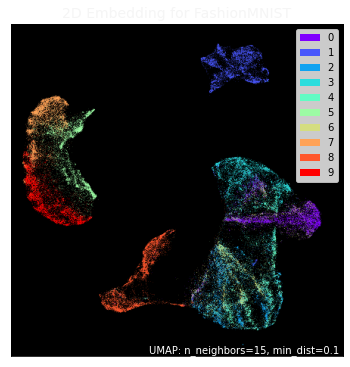

In [12]:
pf = uplot.points(map_fmnist, labels=fmnist.target, width=440, height=440, theme="fire")
pf.set_title('2D Embedding for FashionMNIST', fontsize=14, color="whitesmoke")

### Tuning hyperparameters

(Only `n_neighbors` and `min_dist`)

#### Interactive plot for Digits

In [13]:
hover_data_digits = pd.DataFrame({'index':digits.data.shape[0], 'label':digits.target})

labels_digits = digits.target

tag = int_plot_save(map_digits, labels_digits, hover_data_digits, "digits", "Digits")
print(tag)


<script src="scripts/digits_int.js" id="2374f322-625f-4048-ad3d-2e0aa5ff1067"></script>


#### Function to vary the two hyperparameters

In [14]:
def vary_hyperparameters(n_neighbors=15, min_dist=0.1):
    """
    Varies two UMAP hyperparameters, `n_neighbors` and `min_dist`
    on the Digits dataset from scikit-learn.
    The resulting outputs are reproducible, as the function
    uses `numpy.random.RandomState()`, with seed = 42.
    
    Parameters
    ----------
    n_neighbors: int
        Number of neighbours to use, while forming fuzzy sets
    min_dist: float
        Minimum separation between datapoints
        Takes values between `0` and `1`

    """
    random_state = np.random.RandomState(42)

    return u.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state).fit(digits.data)

Creating combinations of `n_neighbors` and `min_dist`:

In [15]:
import itertools

n_n = [5, 15, 30]
m_d = [0.1, 0.5, 0.9]
combinations = list(itertools.product(n_n, m_d))

Plotting embeddings with edges, per comnination:

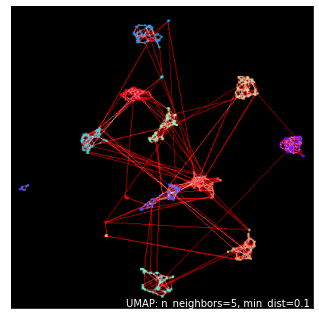

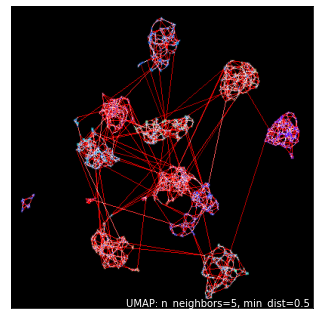

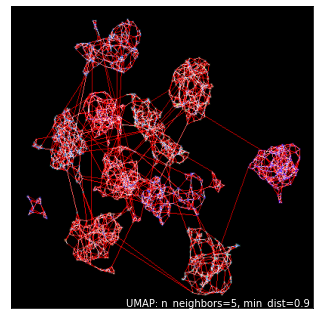

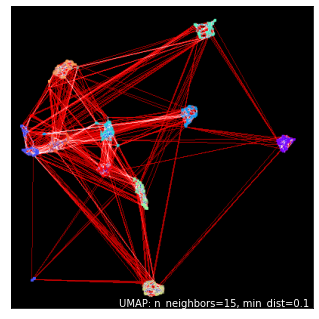

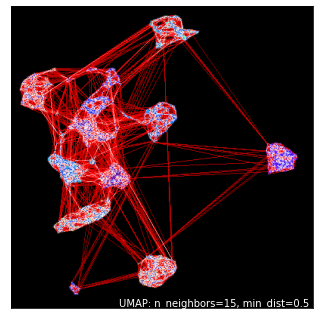

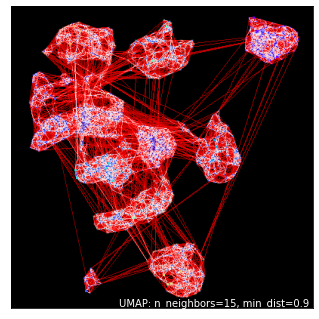

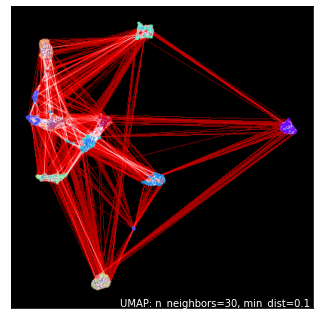

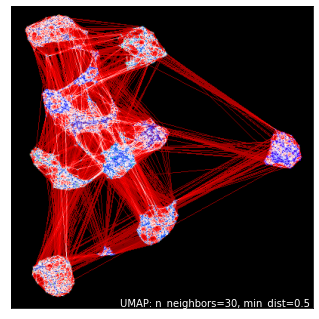

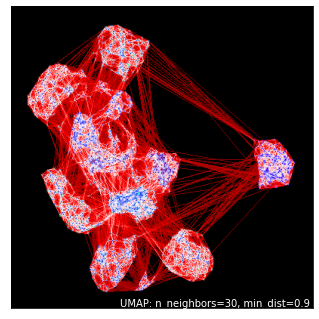

In [16]:
for n, md in combinations:
    embed = vary_hyperparameters(n_neighbors=n, min_dist=md)
    uplot.connectivity(embed, labels=digits.target, show_points=True, width=400, height=400, background="black", color_key_cmap="rainbow", edge_cmap="seismic_r")

### Please refer to the webpage for analysis of these plots and to learn more about UMAP.